# **Titanic Dataset Description**


| Feature Name    | Description                                                                                     |
| --------------- | ----------------------------------------------------------------------------------------------- |
| **PassengerId** | Unique number assigned to each passenger.                                                       |
| **Survived**    | Indicates whether the passenger survived the Titanic disaster. The label we predict.            |
| **Pclass**      | Represents the passenger’s travel class on the ship, which reflects social and economic status. |
| **Name**        | The full recorded name of the passenger, including title (Mr, Mrs, Miss, etc.).                 |
| **Sex**         | Shows whether the passenger was male or female.                                                 |
| **Age**         | Represents how old the passenger was.                                                           |
| **SibSp**       | Counts how many siblings or spouses the passenger had with them on the ship.                    |
| **Parch**       | Counts how many parents or children the passenger had with them on the ship.                    |
| **Ticket**      | The ticket number assigned to the passenger.                                                    |
| **Fare**        | The amount paid for the ticket. Often relates to passenger class or cabin quality.              |
| **Cabin**       | The cabin code assigned to the passenger.                                                       |
| **Embarked**    | The port from which the passenger boarded the ship, indicating their starting location.         |


# **Libraries**


In [1001]:
# Pandas : Data Manipulation
import pandas as pd

# NumPy : Math
import numpy as np
import math

# MatPlotLib
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns
#
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import skew

# Missing Value Imputation
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer


# Spliting
from sklearn.model_selection import train_test_split

# Scaling
from sklearn.preprocessing import RobustScaler , MinMaxScaler , StandardScaler

# Encoding
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
# from category_encoders import OneHotEncoder,BinaryEncoder

# Correlation
# Feature Selection : Categorical
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# Feature Selection : Numerical
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

# Feature Selection : Recursive Feature Elimination
from sklearn.feature_selection import RFE


# Model Selection
from sklearn.model_selection import GridSearchCV

# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score , accuracy_score
from sklearn.metrics import confusion_matrix , classification_report


# regressors
from sklearn.ensemble import RandomForestRegressor , RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor , DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Class**


In [1002]:
class MachineLearning:
  # def __init__ (self , data_frame):
  #   self.data_frame = data_frame
  def data_information (self , data_frame):

    """
        Steps of understanding data to build the model ?

          Analysis :
            - plots of data frame for categorical & numerical
            - Some Math -> describe()

          Preprocessing :
            - Names of columns
            - Data types -> info() or here
            - nulls
            - duplicates
            - unique (num & values)
            - mean & median & mode : -> describe()
            - outliers -> box plot & math ( describe() )


    """


    """
        Just to know the information of each column.
        I get each name of it.
        Also each data type.
    """
    name_of_each_column = [col for col in data_frame]
    data_types_of_each_column = [data_frame[col].dtype for col in data_frame.columns]


    """
        Number of null values in each column is not enough to know if it is huge or not.
        I need to calculate the percentage of it based on length of data frame to make it clear.
    """
    null_values_of_each_column = [data_frame[col].isnull().sum() for col in data_frame.columns]
    percentage_of_null_values_of_each_column = [data_frame[col].isnull().sum() / len(data_frame) * 100 for col in data_frame.columns]


    """
        Unique values make me know :

          - What are the exact values of each column ?
          - Column is categorical or numerical ?

    """
    num_of_unique_values_of_each_column = [data_frame[col].nunique() for col in data_frame.columns]
    unique_values_of_each_column = [data_frame[col].unique() for col in data_frame.columns]
    # data_frame[col].value_counts().head(10).index.to_list()


    """
        What are the num of duplicates in data frame ?
    """
    duplicates = data_frame.duplicated().sum()



    information_of_data = pd.DataFrame(
        {
            'Names' : name_of_each_column ,
            'Values' : unique_values_of_each_column ,
            'Data Type' : data_types_of_each_column ,
            'Unique Num' : num_of_unique_values_of_each_column ,
            'Null Num' : null_values_of_each_column ,
            'Null Percentage' : percentage_of_null_values_of_each_column ,
            'Duplicates' : duplicates
        }
    )

    return information_of_data






# Plots : -

  def bar_plot(self , column , data_frame):
    sns.set_style("whitegrid")
    surviver_counts = data_frame[column].value_counts(normalize=True)*100

    plt.figure(figsize=(6, 6))
    ax = sns.barplot(x=surviver_counts.index, y=data_frame[column].value_counts(), palette="rocket")

    plt.title(f"Percentage of {column} and Non-{column}", fontsize=14, fontweight='bold')
    plt.xlabel(f"{column} Status", fontsize=12, fontweight='bold')
    plt.ylabel("Count", fontsize=12, fontweight='bold')

    for p, percentage in zip(ax.patches, surviver_counts.values):
      ax.annotate(f'{percentage:.1f}%',
                  (p.get_x() + p.get_width() / 2, p.get_height()),
                  ha='center', va='bottom',
                  fontsize=12, fontweight='bold', color='black')
    plt.show()


  def count_plot(self , column , hue , data_frame):
    ax = sns.countplot(x = column , data=data_frame, palette='rocket',hue=hue)

    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(p.get_x() + p.get_width() / 2, height,
                    f'{height/len(data_frame)*100:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

    plt.title(f'Count of {column} with {hue} Status')
    plt.show()


  def histogram_plot(self , column , data_frame):
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 6))

    skewness = skew(data_frame[column], nan_policy="omit")
    sns.histplot(data_frame[column], bins=50, kde=True, color="navy", edgecolor="black")

    plt.xlabel(column, fontsize=14, fontweight='bold')
    plt.ylabel("Frequency", fontsize=14, fontweight='bold')
    plt.title(f"Distribution of {column}", fontsize=16, fontweight='bold')

    plt.text(
        x=data_frame[column].max() * 0.7,
        y=plt.gca().get_ylim()[1] * 0.7,
        s=f"Skewness: {skewness:.2f}",
        fontsize=15, fontweight="bold", color="navy"
    )

    plt.show()


  def strip_plot(self , column_x , column_y , data_frame):
    plt.figure(figsize=(10, 6))
    sns.stripplot(x=data_frame[column_x], y=data_frame[column_y], jitter=True, alpha=0.7, palette=["#1f77b4", "#ff7f0e"])
    plt.xlabel(column_x, fontsize=14, fontweight="bold")
    plt.ylabel(column_y, fontsize=14, fontweight="bold")
    plt.title(f"Strip Plot of {column_y} by {column_x}", fontsize=16, fontweight="bold")
    plt.show()


  def pie_chart(self , column , data_frame):
    satisfaction_counts = data_frame[column].value_counts()

    plt.figure(figsize=(8, 6))
    plt.pie(satisfaction_counts,
            labels=satisfaction_counts.index,
            autopct='%1.1f%%',
            startangle=90,
            colors=plt.cm.Dark2.colors)

    plt.title(f"Distribution of {column}")
    plt.axis('equal')
    plt.show()


  def box_plot(self , column_x , column_y , data_frame):
    plt.figure(figsize=(10,5))
    sns.boxplot(x = column_x, y = column_y, data = data_frame, palette="rocket")

    plt.xlabel(column_x)
    plt.ylabel(column_y)
    plt.title(f'Box Plot of {column_y} by {column_x}')
    plt.show()





# Preprocessing : -

  def handle_null_values(self , handling_type , columns , data_frame):

    # handling_type -> mode , mean (not prefered) , median , knn imputer

    if handling_type == 'mode' :

      for col in columns:
        # replace it with the most frequent value :
        data_frame[col] = data_frame[col].fillna( data_frame[col].mode()[0] )

    elif handling_type == 'knn imputer' :

      for col in columns:
        # replaces it with the previous value, and if it can't find it, then with the next one.
        data_frame[col] = data_frame[col].fillna(method='ffill').fillna(method='bfill')


    elif handling_type == 'median' :

      for col in columns :
        # replace it with the median because if the data is not normally distributed, the mean will be a problem.
        data_frame[col] = data_frame[col].fillna(data_frame[col].median())

    else :
      print("Invalid Value")



  def check_outliers(self , columns , data_frame ,whis = 1.5):

    fig, axes = plt.subplots(3, 3, figsize=(20, 5 * 3))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.boxplot(data=data_frame, y=col, ax=axes[i], palette='magma',whis=whis)
        axes[i].set_title(f'Boxplot of {col}', fontsize=12)
        axes[i].set_xlabel('')
        axes[i].set_ylabel(col)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


  def handle_outliers(self , data_frame , column, upper_value = 1.5 , lower_value = 1.5 , handle = 'no'):

      for col in column:

          Q1=data_frame[col].quantile(0.25)
          Q3=data_frame[col].quantile(0.75)
          IQR=Q3-Q1

          lower_bound=Q1-(lower_value*IQR)
          upper_bound=Q3+(upper_value*IQR)

          outliers_mask_lower = (data_frame['Age'] < lower_bound)
          outliers_mask_upper = (data_frame['Age'] > upper_bound)
          outliers_count_lower = outliers_mask_lower.sum()
          outliers_count_upper = outliers_mask_upper.sum()
          print(f"Number of lower Outliers in {col} : {outliers_count_lower}")
          print(f"Number of upper Outliers in {col} : {outliers_count_upper}")

          if handle == 'yes' :
            data_frame[col]=np.where(data_frame[col]<lower_bound,lower_bound,data_frame[col])
            data_frame[col]=np.where(data_frame[col]>upper_bound,upper_bound,data_frame[col])

      return data_frame



  def spliting_data(self , data_frame , label , test_size = 0.2 , random_state = 42):

    features = data_frame.drop([label],axis=1)
    target =data_frame[label]
    # random_state = 42 -> to make the split the same every time
    features_train , features_test , target_train , target_test = train_test_split(features, target, test_size=test_size, random_state=random_state)

    return features_train , features_test , target_train , target_test


  def scaling_data(self , scaler_type , data_frame , features_train , features_test , columns_list):

    if scaler_type == 'standard scaler':
      # Standard Scalar :
      standard_scaler = StandardScaler()
      features_train[columns_list] = standard_scaler.fit_transform(features_train[columns_list])
      features_test[columns_list] = standard_scaler.transform(features_test[columns_list])


    elif scaler_type == 'min max scaler':
      # Min Max Scalar :
      min_max_scaler = MinMaxScaler()
      features_train[columns_list] = min_max_scaler.fit_transform(features_train[columns_list])
      features_test[columns_list] = min_max_scaler.transform(features_test[columns_list])


    elif scaler_type == 'robust scaler':
      # Robust Scaler :
      robust_scaler = RobustScaler()
      features_train[columns_list] = robust_scaler.fit_transform(features_train[columns_list])
      features_test[columns_list] = robust_scaler.transform(features_test[columns_list])

    else:
      print("There is no scaler type with this name.")


    return features_train , features_test


  def encoding_data(self , encoding_type , features_train , features_test , data_frame , columns_list):

    if encoding_type == 'label':

      label_encoding = LabelEncoder()
      features_train[col]=label_encoding.fit_transform(features_train[col])
      features_test[col]=label_encoding.transform(features_test[col])

    elif encoding_type == 'ordinal':

      # handling unseen data
      all_categories = {}
      for col in columns_list:
          train_cats = features_train[col].unique()
          all_categories[col] = sorted(set(train_cats))

      ordinal_encoder = OrdinalEncoder(
          categories=[all_categories[col] for col in columns_list],
          handle_unknown='use_encoded_value',
          unknown_value=len(all_categories[col])
        )

      features_train[columns_list] = ordinal_encoder.fit_transform(features_train[columns_list])
      features_test[columns_list] = ordinal_encoder.transform(features_test[columns_list])

      return features_train , features_test

    elif encoding_type == 'onehot':

      data_frame = pd.get_dummies(data_frame, columns = columns_list)
      return data_frame


  def correlation(self , features_train , target_train , data_frame , numerical_columns , categorical_columns):

    # Numerical : anova
    x = features_train[numerical_columns]
    y = target_train

    f_values, p_values = f_classif(x, y)

    numerical_anova_data_frame = pd.DataFrame({
        'Feature': numerical_columns,
        'F-Score': f_values,
        'P-Value': p_values
    }).sort_values(by='F-Score', ascending=False)


    # # Categorical : chi2
    x=features_train[categorical_columns]
    y=target_train

    chi2_selector = SelectKBest(score_func=chi2, k='all')
    chi2_selector.fit(x, y)

    categorical_chi2_data_frame = pd.DataFrame({
        'Feature': x.columns,
        'Chi2 Score': chi2_selector.scores_,
        'P-Value': chi2_selector.pvalues_
    }).sort_values(by='Chi2 Score', ascending=False)

    return numerical_anova_data_frame , categorical_chi2_data_frame



  def best_logistic_regression(x_train, x_test, y_train, y_test):

    result = {}
    print(type(x_train))
    print(type(y_train))

    # parameter Grid : Logistic Regression
    lr_param_grid = {
        # regularization strength
          # C : smaller values specify stronger regularization.
          # benefit to avoid overfitting
        'C': [0.01, 0.1, 1],
        # penalty : type of regularization
          # l1 -> Lasso -> can shrink some coefficients to zero, effectively performing feature selection.
          # l2 -> Ridge -> tends to distribute the error among all the features.
        'penalty': ['l1', 'l2'],

        'class_weight': [None, 'balanced']
        # solver : algorithm to use in the optimization problem.
          # liblinear : good for small datasets and supports both l1 and l2 regularization
          # saga : handles large datasets and supports both l1 and l2 regularization
        # 'solver': ['liblinear', 'saga']
    }

    # grid Search : to find the best hyperparameters
    lr_grid = GridSearchCV(
      # random_state = 42 -> same initial weights for comparsion
        estimator = LogisticRegression(random_state=42, max_iter=1000),
        # what parameters to try
        param_grid = lr_param_grid,
        # cross validation
        cv=5,
        # get the accuracy
        scoring='accuracy',
        # run on cpu
        n_jobs=-1,

        verbose=1
    )

    lr_grid.fit(x_train, y_train)

    # best_estimator_ : returns the model with the best hyperparameters found during grid search
    best_lr = lr_grid.best_estimator_
    result['Best Logistic Regression Model'] = best_lr

    y_train_pred_lr = best_lr.predict(x_train)
    # y_train_proba_lr = best_lr.predict_proba(x_train)[:, 1]

    y_test_pred_lr = best_lr.predict(x_test)
    # y_test_pred_proba_lr = best_lr.predict_proba(x_test)[:, 1]

    # calculate metrics -> accuracy , precision , recall , f1 , auc
    lr_metrics_train = {
        # accuracy : (TP + TN) / (TP + TN + FP + FN)
        'accuracy': accuracy_score(y_test, y_test_pred_lr),
        # precision : TP / (TP + FP)
        'precision': precision_score(y_test, y_test_pred_lr),
        # recall : TP / (TP + FN)
        'recall': recall_score(y_test, y_test_pred_lr),
        # f1 score : 2 * (precision * recall) / (precision + recall)
        'f1': f1_score(y_test, y_test_pred_lr),
        # auc : area under the roc curve
        'auc': roc_auc_score(y_test, y_test_pred_lr),
        # best parameters from grid search
        'best_params': lr_grid.best_params_
    }
    lr_metrics_test = {
        # accuracy : (TP + TN) / (TP + TN + FP + FN)
        'accuracy': accuracy_score(y_test, y_test_pred_lr),
        # precision : TP / (TP + FP)
        'precision': precision_score(y_test, y_test_pred_lr),
        # recall : TP / (TP + FN)
        'recall': recall_score(y_test, y_test_pred_lr),
        # f1 score : 2 * (precision * recall) / (precision + recall)
        'f1': f1_score(y_test, y_test_pred_lr),
        # auc : area under the roc curve
        'auc': roc_auc_score(y_test, y_test_pred_lr),
        # best parameters from grid search
        'best_params': lr_grid.best_params_
    }

    result['Logistic Regression Train Metrics'] = lr_metrics_train
    result['Logistic Regression Test Metrics'] = lr_metrics_test

    print("Best Logistic Regression")
    print(f"Best Parameters: {lr_grid.best_params_}")
    print(f"Train Accuracy: {lr_metrics_train['accuracy']:.4f}")
    print(f"Test Accuracy: {lr_metrics_test['accuracy']:.4f}")

    return result

      # svm_param_grid = {
      #     'C': [0.1, 1, 10],
      #     'kernel': ['linear', 'rbf'],
      #     'gamma': ['scale', 'auto']
      # }

      # svm_grid = GridSearchCV(
      #     SVC(random_state=42, probability=True),
      #     svm_param_grid,
      #     cv=5,
      #     scoring='accuracy',
      #     n_jobs=-1
      # )

      # svm_grid.fit(x_train, y_train)
      # best_svm = svm_grid.best_estimator_
      # models['SVM'] = best_svm

      # y_pred_svm = best_svm.predict(x_test)
      # y_pred_proba_svm = best_svm.predict_proba(x_test)[:, 1]

      # svm_metrics = {
      #     'accuracy': accuracy_score(y_test, y_pred_svm),
      #     'precision': precision_score(y_test, y_pred_svm),
      #     'recall': recall_score(y_test, y_pred_svm),
      #     'f1': f1_score(y_test, y_pred_svm),
      #     'auc': roc_auc_score(y_test, y_pred_proba_svm),
      #     'best_params': svm_grid.best_params_
      # }

      # results['SVM'] = svm_metrics

      # print("SVM Completed")
      # print(f"Best Parameters: {svm_grid.best_params_}")
      # print(f"Accuracy: {svm_metrics['accuracy']:.4f}")



# **Code**


## **Loading Data**


In [1003]:
# Load data
data_frame = pd.read_csv('Titanic.csv')

In [1004]:
algorithm = MachineLearning()

## **Information**


In [1005]:
data_frame.shape

(891, 12)

In [1006]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1007]:
algorithm.data_information(data_frame)

,Names,Values,Data Type,Unique Num,Null Num,Null Percentage,Duplicates
0,PassengerId,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",int64,891,0,0.000000,0
1,Survived,"[0, 1]",int64,2,0,0.000000,0
2,Pclass,"[3, 1, 2]",int64,3,0,0.000000,0
3,Name,"[Braund, Mr. Owen Harris, Cumings, Mrs. John B...",object,891,0,0.000000,0
4,Sex,"[male, female]",object,2,0,0.000000,0
5,Age,"[22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,...",float64,88,177,19.865320,0
6,SibSp,"[1, 0, 3, 4, 2, 5, 8]",int64,7,0,0.000000,0
7,Parch,"[0, 1, 2, 5, 3, 4, 6]",int64,7,0,0.000000,0
8,Ticket,"[A/5 21171, PC 17599, STON/O2. 3101282, 113803...",object,681,0,0.000000,0
9,Fare,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....",float64,248,0,0.000000,0


In [1008]:
print(data_frame.isnull().sum().sum())

866


In [1009]:
data_frame.describe().T.style.bar(subset=['mean'], color='#FFA07A').background_gradient(
    subset=['std', '50%', 'max'], cmap='Blues').set_properties(
        **{'font-size': '12pt', 'border': '1.5px solid black'}).set_caption("🔍 Summary Statistics of the Dataset")

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000000,446.000000,257.353842,1.000000,223.500000,446.000000,668.500000,891.000000
Survived,891.000000,0.383838,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.000000,2.308642,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Age,714.000000,29.699118,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
SibSp,891.000000,0.523008,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.000000,0.381594,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.000000,32.204208,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200


### **Data Overview Insights**


1. Shape of data set is 891 rows & 12 columns

2. Nulls are 866 null values

3. there are 5 integer columns + 2 float columns

   - int : [ PassengerId , Survived , Pclass , SibSp , Parch ]

     - PassengerId : can make a problem because it is unique value for each passenger
     - Survived : label column {0, 1}

   - float : [ Age , Fare ]
     - Age : Why is it float ?? & 19.865320% of it are null values

4. there are 5 object columns

   - object : [ Name , Sex , Ticket , Cabin , Embarked ]
     - Name : can make a problem because it is unique value for each passenger
     - Ticket : can make a problem because it is unique value for each passenger
     - Cabin : can make a problem because it is unique value for each passenger & has a huge percentage of null values!! 77.104377%
     - Embarked : 0.224467% of it are null values

5. Outliers :

   - Age Column has a miximum value of 80 , much higher than the 75th percentile (30) , but it is not a problem [it is just an information about passenger and we do not care about how old he / she so it does not seem like a problem]
   - PassengerId column has a miximum value of 891 , much higher than 75th percentile (668) , but i think i will delete this column so yeb it is not a problem
   - Fare column has a miximum value of 512.329 , much much higher than 75th percentile (31) , and i will handle it later

6. Target Variable: Survived
   - 38.3% of customers have survived (mean = 0.383)


In [1010]:
# PassengerId , Name , Ticket , Cabin

numerical_columns = [ 'Fare', 'Age' ]
categorical_columns = [ 'Pclass' , 'Sex' , 'SibSp' , 'Parch' , 'Embarked' ]

**I tried to delete [ 'PassengerId' , 'Ticket' , 'Cabin' ] columns to show the duplicates and It is still = 0**


In [1011]:
# data_frame.drop("PassengerId",inplace=True,axis=1)

In [1012]:
algorithm.data_information(data_frame)

,Names,Values,Data Type,Unique Num,Null Num,Null Percentage,Duplicates
0,PassengerId,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",int64,891,0,0.000000,0
1,Survived,"[0, 1]",int64,2,0,0.000000,0
2,Pclass,"[3, 1, 2]",int64,3,0,0.000000,0
3,Name,"[Braund, Mr. Owen Harris, Cumings, Mrs. John B...",object,891,0,0.000000,0
4,Sex,"[male, female]",object,2,0,0.000000,0
5,Age,"[22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,...",float64,88,177,19.865320,0
6,SibSp,"[1, 0, 3, 4, 2, 5, 8]",int64,7,0,0.000000,0
7,Parch,"[0, 1, 2, 5, 3, 4, 6]",int64,7,0,0.000000,0
8,Ticket,"[A/5 21171, PC 17599, STON/O2. 3101282, 113803...",object,681,0,0.000000,0
9,Fare,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....",float64,248,0,0.000000,0


## **Data Analysis**


### **Target Distribution**


/tmp/ipython-input-3155275104.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=surviver_counts.index, y=data_frame[column].value_counts(), palette="rocket")


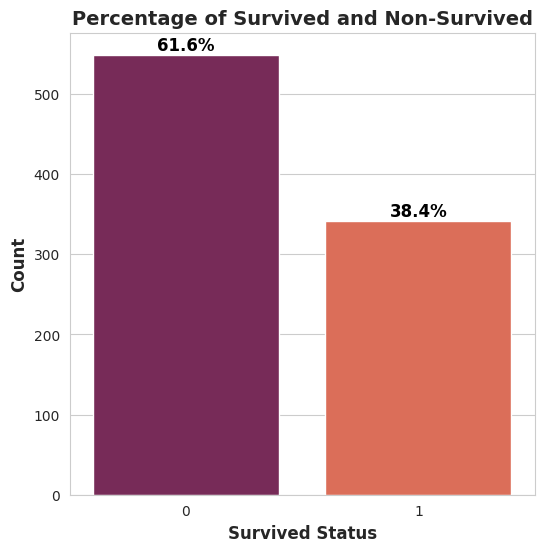

In [1013]:
algorithm.bar_plot('Survived' , data_frame)

**MOST PASSENGERES DID NOT SURVIVED**

- Survived Column has two values [0 -> unsurvived , 1 -> survived].

- Percentage of unsurvived passengers : 61.6% more than percentage of survived passengeres 38.4%.

- We need to explore further to try to determine the cause of this result.


### **Pclass**


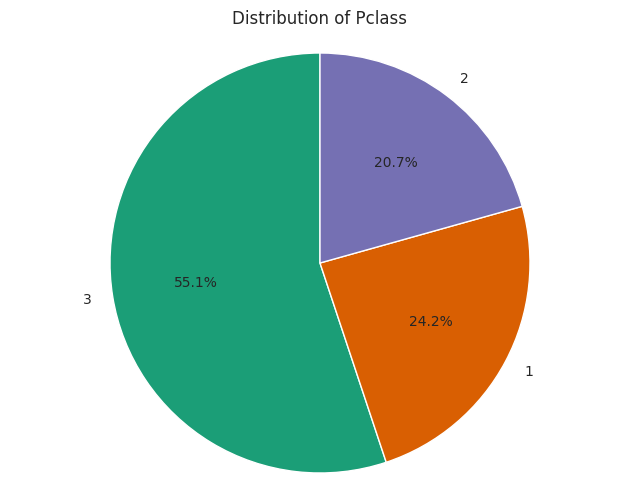

In [1014]:
algorithm.pie_chart('Pclass' , data_frame)

**Pclass Analysis**

- We have 3 travel classes : first , second and third class
- percentage of first class : 24.2%
- percentage of second class : 20.7% (lowest value)
- percentage of third class : 55.1% (highest value)


### **Pclass VS Survived**


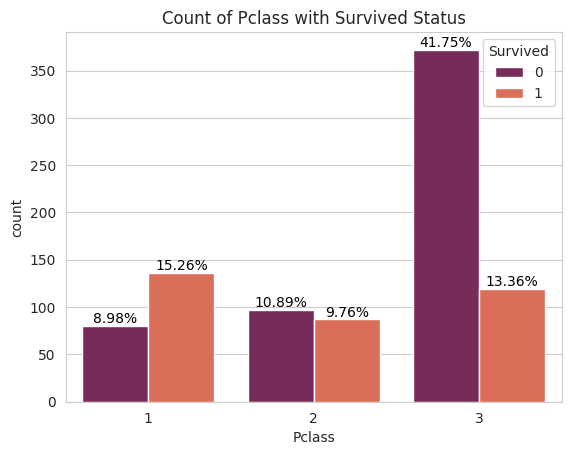

In [1015]:
algorithm.count_plot('Pclass' , 'Survived' , data_frame)

**Analysis of Survived by Pclass**

- for first class :

  - 24.2% of passengers are in the first class -> (216)
    - 8.98% -> Not Survived -> (80 passengers)
    - 15.26% -> Survived -> (136 passengers)
  - first class is the highest place of the ship , so it is possible for them to rescue easier than others

- for second class (lowest amount of passengers) :

  - 20.7% of passengers are in the second class -> (184 passengers)
    - 10.89% -> Not Survived -> (97 passengers)
    - 9.76% -> Survived -> (87 passengers)
  - the percentage of the survived and unsurvived passengers is very closer to each other.

- for third class (highest amount of passengers) :
  - 55.1% of passengers are in the third class -> (491 passengers)
    - 41.75% -> Not Survived -> (372 passengers)
    - 13.36% -> Survived -> (119 passengers)
  - it is clearly hard to survive as you are in the lowest level of the ship so it is logical to get this result

**Total Number of Survived Passengers = 342** \
**Total Number of Not Survived Passengers = 549**

**NOTE : number of passengers is calculated based on the whole number of rows (891)**


### **Sex VS Survived**


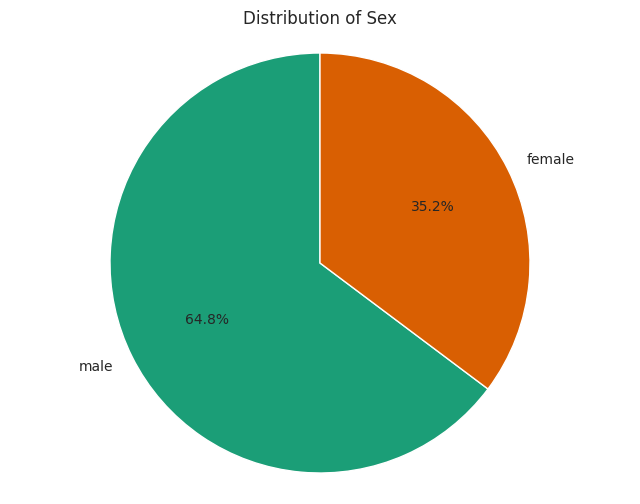

In [1016]:
algorithm.pie_chart('Sex' , data_frame)

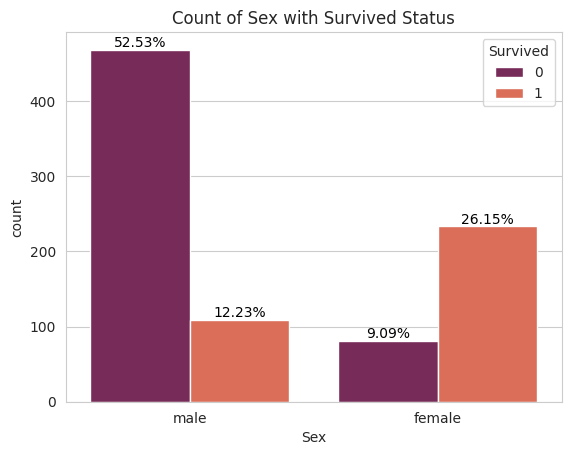

In [1017]:
algorithm.count_plot('Sex' , 'Survived' , data_frame)

**Analysis of Survived by Sex**

- 64.8% of passengers are male -> (577 passengers)

  - 52.53% -> Not Survived -> (468 passengers)
  - 12.23% -> Survived -> (109 passengers)
  - HUGE NUMBER of male passengers are not survived compared to the female passengers

- 35.2 of passengers are female -> (314 passengers)
  - 9.09% -> Not Survived -> (81 passengers)
  - 26.15% -> Survived -> (233 passengeres)
  - most of the female passengers are survived which is normal (in these cases , the highest priority is to save women , children and old people)


### **SibSp VS Survived**


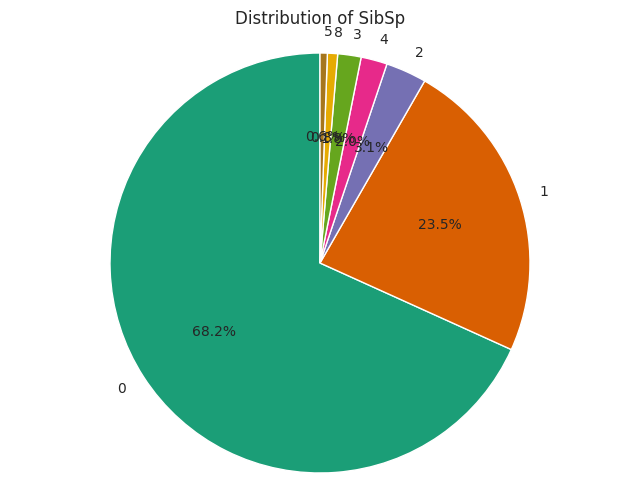

In [1018]:
algorithm.pie_chart('SibSp' , data_frame)

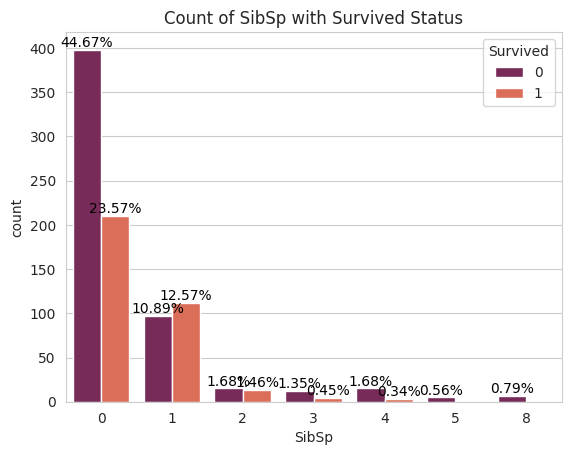

In [1019]:
algorithm.count_plot('SibSp' , 'Survived' , data_frame)

**Analysis of Survived by SibSp**

- range of siblings & Spouses is [0 : 8]

- most of passengers do not have siblings or spouses , it is clear that they have the big chance to survive.
- The more siblings or spouses there are, the lower the chances of survival, because, naturally, you will rush to save your family.
- so passengers that have 5 or 8 partner in this trip , their chance to survive is 0
- but so how , passengers with 1 partner have a higher chance to survive , maybe cause they found a partner to help them survive even if he / she will die but he / she sacrifices his / her life to save the other one ... maybe


### **Parch VS Survived**


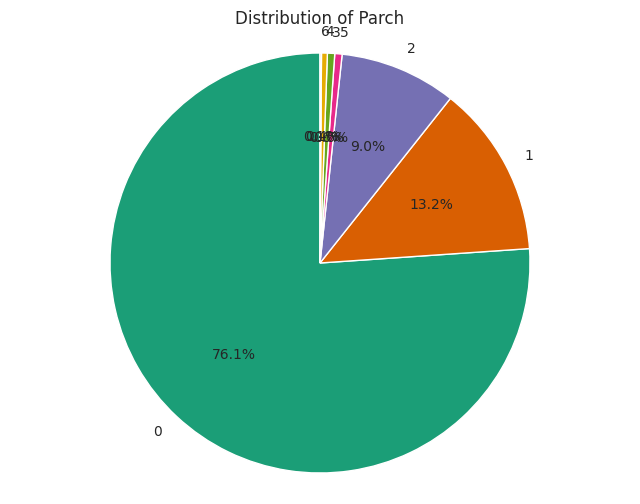

In [1020]:
algorithm.pie_chart('Parch' , data_frame)

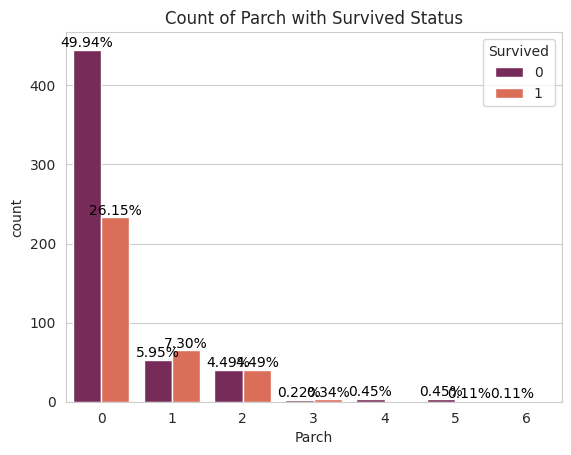

In [1021]:
algorithm.count_plot('Parch' , 'Survived' , data_frame)

**Analysis of Survived by Parch**

**The Same as SibSp**

- range of parents & children is [0 : 6]
- and also the passengers with one partner have a higher chance to survive


### **Fare VS Survived**


/tmp/ipython-input-3155275104.py:162: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = column_x, y = column_y, data = data_frame, palette="rocket")


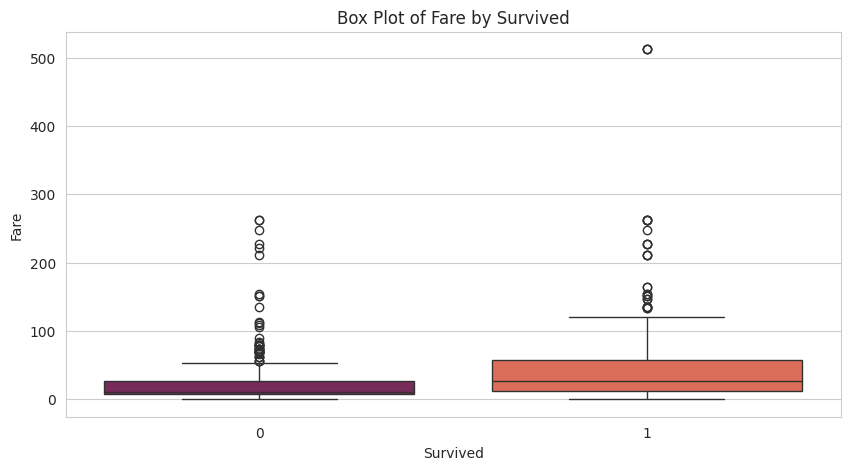

In [1022]:
algorithm.box_plot( 'Survived' , 'Fare' , data_frame)

**The fares paid by passengers diagram shows :**

- For those who survived -> (1) :

  - we'll need to increase the coefficient (1.5).
  - higher median -> higher fare

- For those who are not survived -> (0) :

  - a large amount of data are close to the max value, so we'll also need to increase the coefficient (1.5) by a much larger value.
  - lower median -> lower fare


### **Age VS Survived**


/tmp/ipython-input-3155275104.py:162: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = column_x, y = column_y, data = data_frame, palette="rocket")


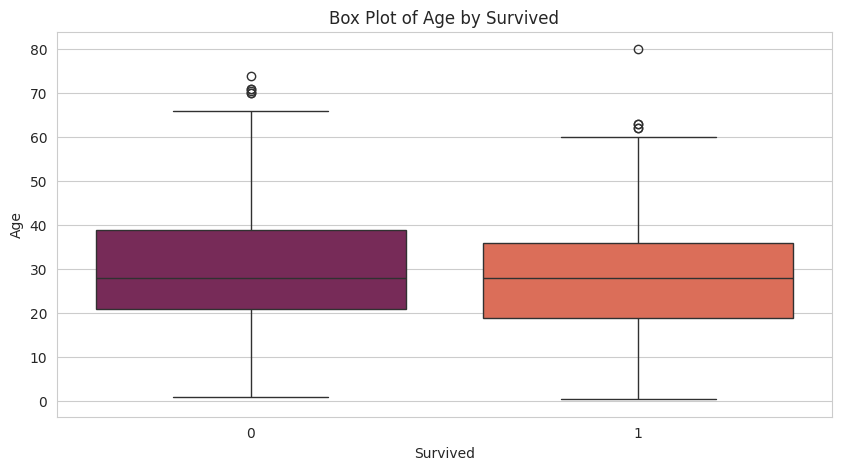

In [1023]:
algorithm.box_plot( 'Survived' , 'Age' , data_frame)

**The age of passengers diagram shows :**

**The median is equal in both the survival and non-survival cases.**

- For those who survived -> (1) :

  - moderate median age nearly with fairly wide interquartile range.
  - we'll need to increase the coefficient (1.5) by a much larger value.

- For those who are not survived -> (0) :

  - has a farily wide interquartile range
  - a large amount of data are close to the max value, so we'll need to increase the coefficient (1.5) by a much larger value.


### **Age**


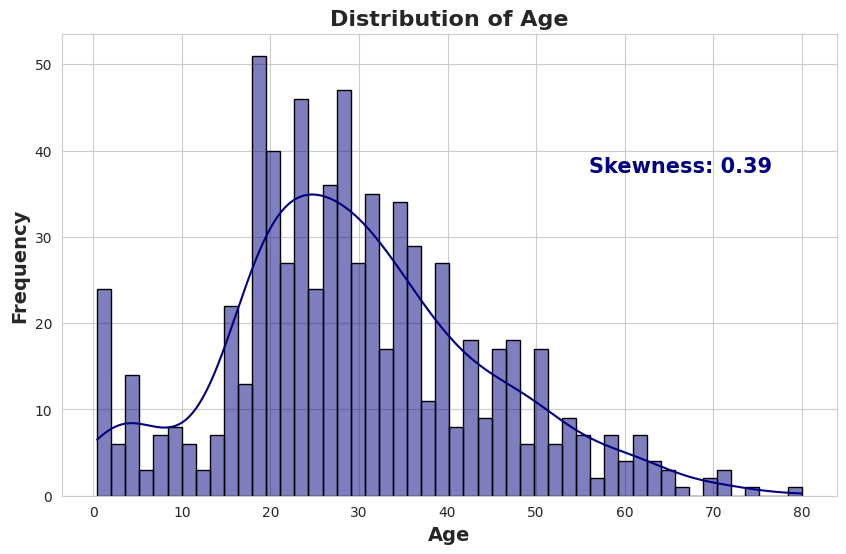

In [1024]:
algorithm.histogram_plot('Age' , data_frame)

**Analysis of Age Distribution**

**Left-Skewed Distribution (Positive Skewness = 0.39)**

**The age distribution of passengers shows the following :**

- Passengers aged 20-30 are the most numerous (mostly young).

- There are also much older passengers, up to 80 years old, but their numbers are significantly lower. Therefore, the distribution has a tail on the left side.

- There are also younger passengers, with those aged one to two years having a fairly large proportion.

**Outliers in the distribution :**

- Passengers are mostly between 20 and 30 years old, but the higher values ​​create a leftward skew.
- Logically, this isn't a problem if there are older passengers, whether their number is small or large. This isn't unusual information, so we don't need to treat with it. all I have to do is to increase the coefficient


### **Fare**


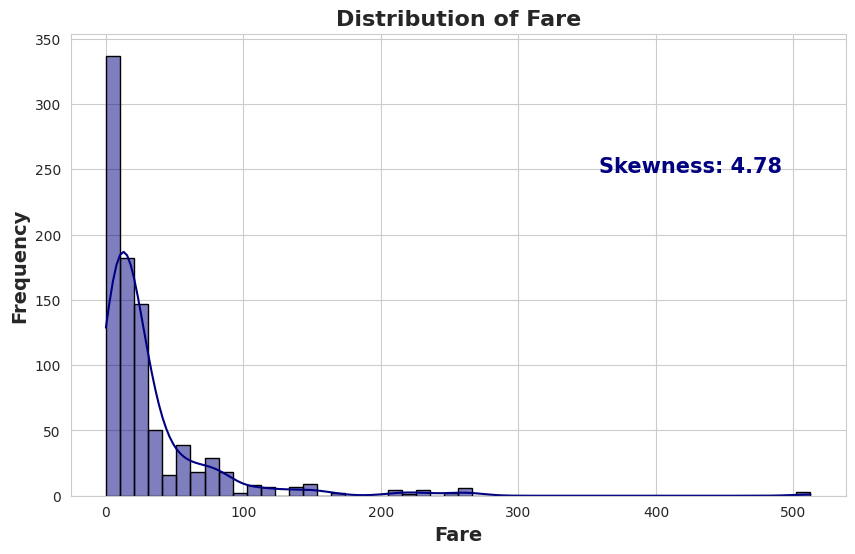

In [1025]:
algorithm.histogram_plot('Fare' , data_frame)

**Analysis of Fare Distribution**

**Left-Skewed Distribution (skewness = 4.78)**

**The fare distribution shows the following:**

- Most passengers paid between 5 and 30 (approximately) → That's why the poles there are so high.

- As we move to the right, the fare increases, but we find very few people paying over 100, over 200, and very rarely over 500.

- This means that a very small number of people were in luxurious cabins with very high fares.

**Outliers in the Distribution:**

- There are many outliers because a very small number of people paid huge fares while most paid small amounts. This means that a very small number of people are wealthy, and the rest are from the general public, the poor.


### **Fare VS Pclass**


/tmp/ipython-input-3155275104.py:162: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = column_x, y = column_y, data = data_frame, palette="rocket")


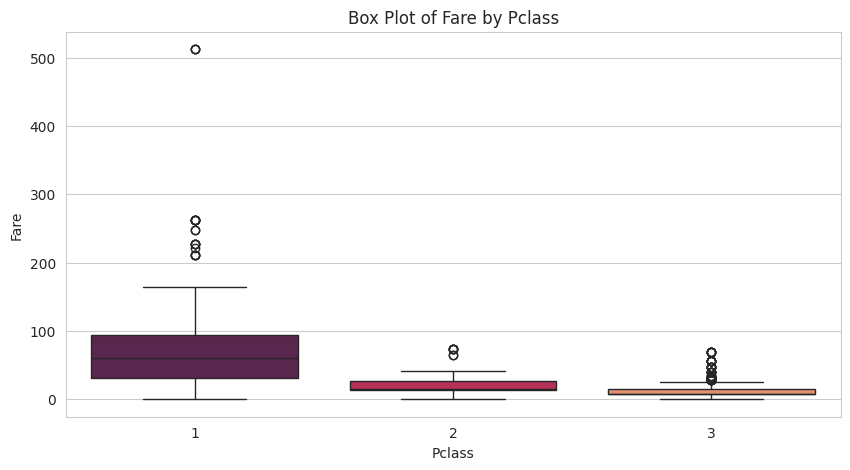

In [1026]:
algorithm.box_plot('Pclass' , 'Fare' , data_frame)

**Analysis between Fare & Pclass**

- first class

  - fairly wide interquartile range

- second class

  - its wide is very thick compared to 1st class
  - median is very closer to q1
  - maybe i will have to use a large coefficient or not.

- third class
  - much much thicker compared to 2nd class
  - its median it the smallest value
  - absolutly i will need to increase the coefficient


### **Embarked**


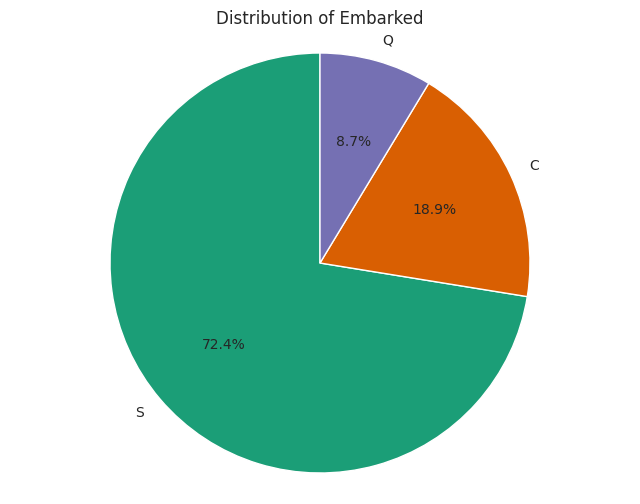

In [1027]:
algorithm.pie_chart('Embarked' , data_frame)

**Embarked Analysis**

There are three types of starting location (embarked) :

- S with the highest percentage (72.4%)
- C with percentage of 18.9%
- Q with the least percentage (8.7%)


### **Pclass VS Embarked**


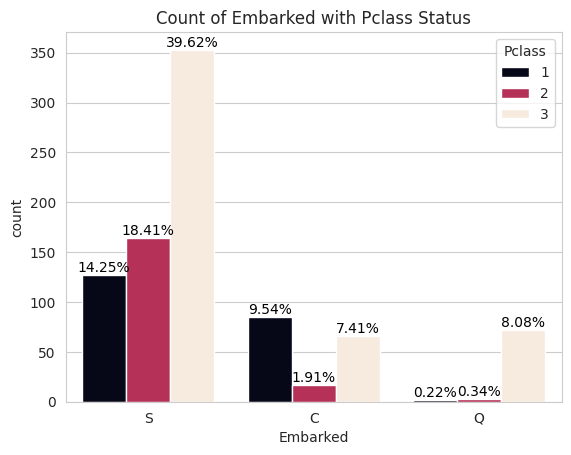

In [1028]:
algorithm.count_plot('Embarked' , 'Pclass' , data_frame)

**Analysis of Pclass by Embarked**

- S with the highest percentage (72.4%) -> (645 passenger) : more the half of passengers came from there

  - first class : 14.25% -> (127 passengers)
  - second class : 18.41% -> (164 passengers)
  - third class : 39.62% -> (353 passengers)
  - it is very clear that this location is the least wealthy of them.

- C with percentage of 18.9% -> (168 passengers)

  - first class : 9.54% -> (85 passengers)
  - second class : 1.91% -> (17 passengers)
  - third class : 7,41% -> (66 passengers)

- Q with the least percentage (8.7%) -> (77 passengers)
  - first class : 0.22% -> (2 passengers)
  - second class : 0.34% -> (3 passengers)
  - third class : 8.08% -> (72 passengers)

**Note**

- HUGE DIFFERENCE between number of passengers came from S location and (C + Q) location , not even three times their number.

- S -> Most number of passengers came from there (in order ->[3 , 2 , 1] class)
- C -> Closer number to passengers came from Q (in order [1 , 3 , 2] class)
- Q -> Least number of passengers came from there (in order -> [3 , 2 , 1] class)

- Most number of first class came from 'C' , 'S' and Least from 'Q'
- Most number of second class came from 'C' , 'C' and Least from 'Q'
- Most number of third class came from 'C' , 'Q' and Least from 'C'


## **Preprocessing**


In [1029]:
algorithm.data_information(data_frame)

,Names,Values,Data Type,Unique Num,Null Num,Null Percentage,Duplicates
0,PassengerId,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",int64,891,0,0.000000,0
1,Survived,"[0, 1]",int64,2,0,0.000000,0
2,Pclass,"[3, 1, 2]",int64,3,0,0.000000,0
3,Name,"[Braund, Mr. Owen Harris, Cumings, Mrs. John B...",object,891,0,0.000000,0
4,Sex,"[male, female]",object,2,0,0.000000,0
5,Age,"[22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,...",float64,88,177,19.865320,0
6,SibSp,"[1, 0, 3, 4, 2, 5, 8]",int64,7,0,0.000000,0
7,Parch,"[0, 1, 2, 5, 3, 4, 6]",int64,7,0,0.000000,0
8,Ticket,"[A/5 21171, PC 17599, STON/O2. 3101282, 113803...",object,681,0,0.000000,0
9,Fare,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....",float64,248,0,0.000000,0


There's a **problem** with the **Duplicate Values** ​​dialog box; it's not showing up. I tried deleting a lot of data, but ultimately, it resulted in deleting an illogical amount of data without justification. So, I decided to delete columns like:

- PassengerId: It's very obvious why I deleted it; I don't need to explain.
- Cabin: The percentage of missing values ​​is very high, more than 70%.
- Ticket: Also likely to be deleted because it will cause problems later since it's almost identical for each passenger.
- Name: Exactly the same reason as ID.

**Note** : that I didn't completely discard them; I saved them in case I need them in the future to create new columns.


In [1030]:
# print(data_frame.duplicated(subset=['PassengerId']).sum()) # 0
print(data_frame.duplicated(subset=['Age', 'Sex', 'Pclass' , 'Embarked' , 'Survived' , 'SibSp' , 'Parch' , 'Fare']).sum())

111


In [1031]:
Name = data_frame['Name']
PassengerId = data_frame['PassengerId']
Ticket = data_frame['Ticket']
Cabin = data_frame['Cabin']

data_frame = data_frame.drop(['Name' , 'PassengerId' , 'Ticket' , 'Cabin'], axis=1)

In [1032]:
algorithm.data_information(data_frame)

,Names,Values,Data Type,Unique Num,Null Num,Null Percentage,Duplicates
0,Survived,"[0, 1]",int64,2,0,0.000000,111
1,Pclass,"[3, 1, 2]",int64,3,0,0.000000,111
2,Sex,"[male, female]",object,2,0,0.000000,111
3,Age,"[22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,...",float64,88,177,19.865320,111
4,SibSp,"[1, 0, 3, 4, 2, 5, 8]",int64,7,0,0.000000,111
5,Parch,"[0, 1, 2, 5, 3, 4, 6]",int64,7,0,0.000000,111
6,Fare,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....",float64,248,0,0.000000,111
7,Embarked,"[S, C, Q, nan]",object,3,2,0.224467,111


### **Handling Null Values**


In [1033]:
# 'Age' , 'Cabin' , 'Embarked'

algorithm.handle_null_values('mode' , ['Embarked'] , data_frame)
algorithm.handle_null_values('median' , ['Age'] , data_frame)

In [1034]:

algorithm.data_information(data_frame)

,Names,Values,Data Type,Unique Num,Null Num,Null Percentage,Duplicates
0,Survived,"[0, 1]",int64,2,0,0.0,116
1,Pclass,"[3, 1, 2]",int64,3,0,0.0,116
2,Sex,"[male, female]",object,2,0,0.0,116
3,Age,"[22.0, 38.0, 26.0, 35.0, 28.0, 54.0, 2.0, 27.0...",float64,88,0,0.0,116
4,SibSp,"[1, 0, 3, 4, 2, 5, 8]",int64,7,0,0.0,116
5,Parch,"[0, 1, 2, 5, 3, 4, 6]",int64,7,0,0.0,116
6,Fare,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....",float64,248,0,0.0,116
7,Embarked,"[S, C, Q]",object,3,0,0.0,116


### **Handling Outliers**


In [1035]:
data_frame.describe().T.style.bar(subset=['mean'], color='#FFA07A').background_gradient(
    subset=['std', '50%', 'max'], cmap='Blues').set_properties(
        **{'font-size': '12pt', 'border': '1.5px solid black'}).set_caption("🔍 Summary Statistics of the Dataset")

,count,mean,std,min,25%,50%,75%,max
Survived,891.000000,0.383838,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.000000,2.308642,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Age,891.000000,29.361582,13.019697,0.420000,22.000000,28.000000,35.000000,80.000000
SibSp,891.000000,0.523008,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.000000,0.381594,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.000000,32.204208,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200


In [1036]:
algorithm.data_information(data_frame)

,Names,Values,Data Type,Unique Num,Null Num,Null Percentage,Duplicates
0,Survived,"[0, 1]",int64,2,0,0.0,116
1,Pclass,"[3, 1, 2]",int64,3,0,0.0,116
2,Sex,"[male, female]",object,2,0,0.0,116
3,Age,"[22.0, 38.0, 26.0, 35.0, 28.0, 54.0, 2.0, 27.0...",float64,88,0,0.0,116
4,SibSp,"[1, 0, 3, 4, 2, 5, 8]",int64,7,0,0.0,116
5,Parch,"[0, 1, 2, 5, 3, 4, 6]",int64,7,0,0.0,116
6,Fare,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....",float64,248,0,0.0,116
7,Embarked,"[S, C, Q]",object,3,0,0.0,116


/tmp/ipython-input-3155275104.py:209: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_frame, y=col, ax=axes[i], palette='magma',whis=whis)
/tmp/ipython-input-3155275104.py:209: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_frame, y=col, ax=axes[i], palette='magma',whis=whis)


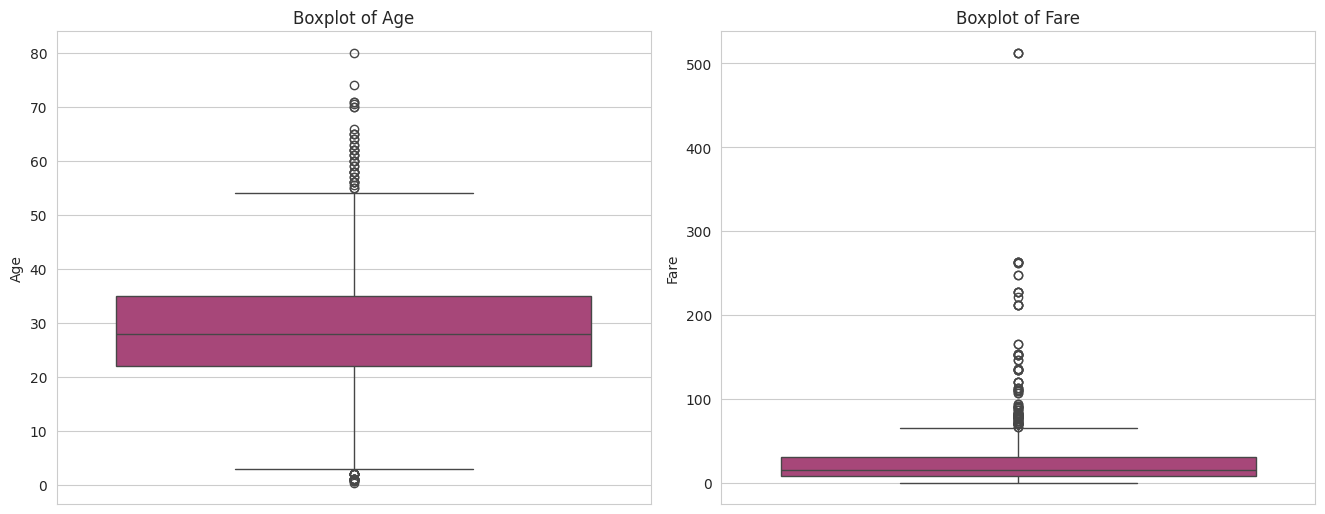

In [1037]:
columns = ['Age' , 'Fare']
algorithm.check_outliers(columns ,data_frame )

There is a problem when I try to change the coefficient (1.5) , I searched many websites but I cannot figure how to do something like that and get these columns handled.


In [1038]:
# data_frame['Age'] = data_frame['Age'].astype(int)
# data_frame = algorithm.handle_outliers(data_frame , ['Age'] ,4 , 1.7 , 'yes' )
# algorithm.check_outliers(['Age'] , data_frame , [0,100])

In [1039]:
# data_frame = algorithm.handle_outliers(data_frame , ['Fare'] , 7 , 1.5 , 'yes')
# algorithm.check_outliers(['Fare'] , data_frame)

Number of lower Outliers in Age : 24
Number of upper Outliers in Age : 42
Number of lower Outliers in Fare : 0
Number of upper Outliers in Fare : 0


/tmp/ipython-input-3155275104.py:209: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_frame, y=col, ax=axes[i], palette='magma',whis=whis)
/tmp/ipython-input-3155275104.py:209: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_frame, y=col, ax=axes[i], palette='magma',whis=whis)


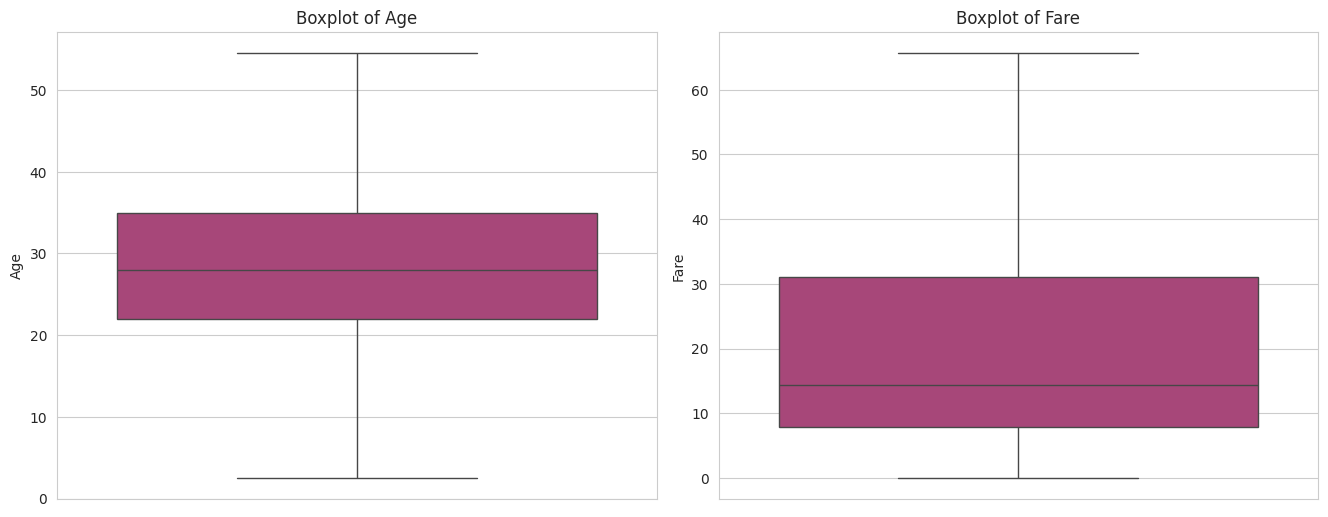

In [1040]:
data_frame['Age'] = data_frame['Age'].astype(int)
data_frame = algorithm.handle_outliers(data_frame , columns , handle = 'yes')
algorithm.check_outliers(columns , data_frame)

In [1041]:
algorithm.data_information(data_frame)

,Names,Values,Data Type,Unique Num,Null Num,Null Percentage,Duplicates
0,Survived,"[0, 1]",int64,2,0,0.0,133
1,Pclass,"[3, 1, 2]",int64,3,0,0.0,133
2,Sex,"[male, female]",object,2,0,0.0,133
3,Age,"[22.0, 38.0, 26.0, 35.0, 28.0, 54.0, 2.5, 27.0...",float64,54,0,0.0,133
4,SibSp,"[1, 0, 3, 4, 2, 5, 8]",int64,7,0,0.0,133
5,Parch,"[0, 1, 2, 5, 3, 4, 6]",int64,7,0,0.0,133
6,Fare,"[7.25, 65.6344, 7.925, 53.1, 8.05, 8.4583, 51....",float64,204,0,0.0,133
7,Embarked,"[S, C, Q]",object,3,0,0.0,133


In [1042]:
data_frame.describe().T.style.bar(subset=['mean'], color='#FFA07A').background_gradient(
    subset=['std', '50%', 'max'], cmap='Blues').set_properties(
        **{'font-size': '12pt', 'border': '1.5px solid black'}).set_caption("🔍 Summary Statistics of the Dataset")

,count,mean,std,min,25%,50%,75%,max
Survived,891.000000,0.383838,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.000000,2.308642,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Age,891.000000,29.030303,12.070192,2.500000,22.000000,28.000000,35.000000,54.500000
SibSp,891.000000,0.523008,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.000000,0.381594,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.000000,24.046813,20.481625,0.000000,7.910400,14.454200,31.000000,65.634400


### **Feature Extraction**


Useful Feature

In [1043]:
data_frame['FamilySize'] = data_frame['SibSp'] + data_frame['Parch'] + 1
print(data_frame['FamilySize'].unique())
data_frame = data_frame.drop(['SibSp' , 'Parch'] , axis = 1)

[ 2  1  5  3  7  6  4  8 11]


### **Feature Engineering**


Bad Features

In [1044]:
# data_frame['Title'] = Name.str.extract(' ([A-Za-z]+)\.', expand=False)
# print(data_frame['Title'].unique())

# """
# ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
#  'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']
# """
# single_titles = [ 'Miss', 'Mlle', 'Master', 'Ms' ]
# nobility_titles = [ 'Lady', 'Sir', 'Countess', 'Don', 'Jonkheer' ]
# married_titles = [ 'Mrs', 'Lady', 'Countess',  'Mme', 'Mr', 'Don', 'Sir', 'Major', 'Col', 'Capt' ]
# young_titles = [ 'Miss', 'Master', 'Mlle' ]
# adult_titles = [ 'Mr', 'Mrs', 'Dr', 'Rev' ]

# def is_married(title):
#     married_titles = [ 'Mrs', 'Lady', 'Countess',  'Mme', 'Mr', 'Don', 'Sir', 'Major', 'Col', 'Capt' ]
#     return title in married_titles

# def is_adult(title):
#     adult_titles = [ 'Mr', 'Mrs', 'Dr', 'Rev' ]
#     return title in adult_titles

In [1045]:
# data_frame['isMarried'] = data_frame['Title'].apply(is_married)
# print(data_frame['isMarried'].unique())

In [1046]:
# data_frame['isMarried'] = data_frame['isMarried'].astype(int)
# print(data_frame['isMarried'].unique())

In [1047]:
# data_frame['isAdult'] = data_frame['Title'].apply(is_adult)
# print(data_frame['isAdult'].unique())

In [1048]:
# data_frame['isAdult'] = data_frame['isAdult'].astype(int)
# print(data_frame['isAdult'].unique())

In [1049]:
# data_frame['FarePerPerson'] = data_frame['Fare'] / data_frame['FamilySize']

In [1050]:
# data_frame['FarePerClass'] = data_frame['Fare'] / data_frame['Pclass']

In [1051]:
algorithm.data_information(data_frame)

,Names,Values,Data Type,Unique Num,Null Num,Null Percentage,Duplicates
0,Survived,"[0, 1]",int64,2,0,0.0,136
1,Pclass,"[3, 1, 2]",int64,3,0,0.0,136
2,Sex,"[male, female]",object,2,0,0.0,136
3,Age,"[22.0, 38.0, 26.0, 35.0, 28.0, 54.0, 2.5, 27.0...",float64,54,0,0.0,136
4,Fare,"[7.25, 65.6344, 7.925, 53.1, 8.05, 8.4583, 51....",float64,204,0,0.0,136
5,Embarked,"[S, C, Q]",object,3,0,0.0,136
6,FamilySize,"[2, 1, 5, 3, 7, 6, 4, 8, 11]",int64,9,0,0.0,136


### **Duplicates**


In [1052]:
data_frame.drop_duplicates(inplace=True)

## **Splitting**


In [1053]:
features_train , features_test , target_train , target_test = algorithm.spliting_data(data_frame , 'Survived')

In [1054]:
algorithm.data_information(features_train)

,Names,Values,Data Type,Unique Num,Null Num,Null Percentage,Duplicates
0,Pclass,"[3, 2, 1]",int64,3,0,0.0,13
1,Sex,"[female, male]",object,2,0,0.0,13
2,Age,"[16.0, 22.0, 19.0, 21.0, 33.0, 35.0, 30.0, 2.5...",float64,53,0,0.0,13
3,Fare,"[46.9, 7.8958, 7.75, 7.8792, 65.6344, 7.775, 2...",float64,188,0,0.0,13
4,Embarked,"[S, Q, C]",object,3,0,0.0,13
5,FamilySize,"[8, 1, 2, 3, 5, 4, 7, 6, 11]",int64,9,0,0.0,13


## **Scalling**


In [1055]:
columns_list = ['Fare' , 'Age']
x_train_ss , x_test_ss = algorithm.scaling_data('standard scaler' , data_frame , features_train , features_test , columns_list)
x_train_mms , x_test_mms = algorithm.scaling_data('min max scaler' , data_frame , features_train , features_test , columns_list)
x_train_rs , x_test_rs = algorithm.scaling_data('robust scaler' , data_frame , features_train , features_test , columns_list)

## **Encoding**


In [1056]:
# column_list = ['Sex' , 'Embarked' , 'Title' ]
column_list = ['Sex' , 'Embarked']
x_train_ss , x_test_ss = algorithm.encoding_data( 'ordinal' , x_train_ss , x_test_ss , data_frame , column_list)
x_train_mms , x_test_mms = algorithm.encoding_data( 'ordinal' , x_train_mms , x_test_mms , data_frame , column_list)
x_train_rs , x_test_rs = algorithm.encoding_data( 'ordinal' , x_train_rs , x_test_rs , data_frame , column_list)

## **Feature Engineering**

In [1057]:
x_train_ss['Fare_Sex'] = x_train_ss['Fare'] * x_train_ss['Sex']
x_test_ss['Fare_Sex'] = x_test_ss['Fare'] * x_test_ss['Sex']

x_train_mms['Fare_Sex'] = x_train_mms['Fare'] * x_train_mms['Sex']
x_test_mms['Fare_Sex'] = x_test_mms['Fare'] * x_test_mms['Sex']

x_train_rs['Fare_Sex'] = x_train_rs['Fare'] * x_train_rs['Sex']
x_test_rs['Fare_Sex'] = x_test_rs['Fare'] * x_test_rs['Sex']

## **Feature Selection / Correlation**


In [1060]:
# categorical_columns = ['Pclass' , 'Sex' , 'SibSp' , 'Parch' , 'Embarked' , 'Title' , 'isMarried' , 'isAdult' , 'FamilySize']
categorical_columns = ['Pclass' , 'Sex' , 'Embarked' , 'FamilySize']
# numerical_columns = ['Age' , 'Fare' , 'Fare_Sex' , 'FarePerPerson' , 'FarePerClass']
# numerical_columns = ['Age' , 'Fare' , 'Fare_Sex' , 'FarePerClass']
numerical_columns = ['Age' , 'Fare' , 'Fare_Sex']

### **Standard Scaler**


In [1062]:
numerical_anova_ss_data_frame , categorical_mi_ss_data_frame = algorithm.correlation(x_train_ss , target_train , data_frame , numerical_columns , categorical_columns)

In [1063]:
numerical_anova_ss_data_frame

,Feature,F-Score,P-Value
1,Fare,55.559031,3.171513e-13
0,Age,1.799732,1.802507e-01
2,Fare_Sex,0.415323,5.195257e-01


In [1064]:
categorical_mi_ss_data_frame

,Feature,Chi2 Score,P-Value
1,Sex,54.847275,1.302693e-13
0,Pclass,22.791201,1.805907e-06
2,Embarked,5.249641,2.195130e-02
3,FamilySize,0.027437,8.684388e-01


### **Min Max Scaler**


In [1065]:
numerical_anova_mms_data_frame , categorical_mi_mms_data_frame = algorithm.correlation(x_train_mms , target_train , data_frame , numerical_columns , categorical_columns)

In [1066]:
numerical_anova_mms_data_frame

,Feature,F-Score,P-Value
1,Fare,55.559031,3.171513e-13
0,Age,1.799732,1.802507e-01
2,Fare_Sex,0.415323,5.195257e-01


In [1067]:
categorical_mi_mms_data_frame

,Feature,Chi2 Score,P-Value
1,Sex,54.847275,1.302693e-13
0,Pclass,22.791201,1.805907e-06
2,Embarked,5.249641,2.195130e-02
3,FamilySize,0.027437,8.684388e-01


### **Robust Scaler**


In [1068]:
numerical_anova_rs_data_frame , categorical_mi_rs_data_frame = algorithm.correlation(x_train_rs , target_train , data_frame , numerical_columns , categorical_columns)

In [1069]:
numerical_anova_rs_data_frame

,Feature,F-Score,P-Value
1,Fare,55.559031,3.171513e-13
0,Age,1.799732,1.802507e-01
2,Fare_Sex,0.415323,5.195257e-01


In [1070]:
categorical_mi_rs_data_frame

,Feature,Chi2 Score,P-Value
1,Sex,54.847275,1.302693e-13
0,Pclass,22.791201,1.805907e-06
2,Embarked,5.249641,2.195130e-02
3,FamilySize,0.027437,8.684388e-01


## **Best Case :**

In [1074]:
algorithm.data_information(x_train_ss)

,Names,Values,Data Type,Unique Num,Null Num,Null Percentage,Duplicates
0,Pclass,"[3, 2, 1]",int64,3,0,0.0,13
1,Sex,"[0.0, 1.0]",float64,2,0,0.0,13
2,Age,"[-0.8000000000000002, -0.39999999999999997, -0...",float64,53,0,0.0,13
3,Fare,"[1.2018504991477967, -0.3176703189676164, -0.3...",float64,188,0,0.0,13
4,Embarked,"[2.0, 1.0, 0.0]",float64,3,0,0.0,13
5,FamilySize,"[8, 1, 2, 3, 5, 4, 7, 6, 11]",int64,9,0,0.0,13
6,Fare_Sex,"[0.0, -0.3176703189676164, 1.9317029461894328,...",float64,144,0,0.0,13


## **Logistic Regression**


### **Grid Search**

In [ ]:
# lr_param_grid = {
#     'C': [0.01, 0.1, 1],
#     'penalty': ['l1', 'l2'],
#     'solver': ['liblinear', 'saga'],
#     'class_weight': [None, 'balanced']
# }

In [ ]:
# lr_grid_ss = GridSearchCV(
#     estimator = LogisticRegression(random_state=42),
#     param_grid = lr_param_grid,
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1,
#     verbose=1
# )


# lr_grid_ss.fit(x_train_ss, target_train)

# best_lr_ss = lr_grid_ss.best_estimator_

# y_train_pred_lr_ss = best_lr_ss.predict(x_train_ss)

# y_test_pred_lr_ss = best_lr_ss.predict(x_test_ss)

# print("Best Logistic Regression : - ")

# print(f"Best Parameters: {lr_grid_ss.best_params_}")
# print(f"Train Accuracy: {accuracy_score(target_train, y_train_pred_lr_ss):.4f}")
# print(f"Test Accuracy: {accuracy_score(target_test, y_test_pred_lr_ss):.4f}")


### **Accuracy Of Logistic Regression**

1. Standard Scaler :
    - Without Anything :
      - Train : 78 %
      - Test : 79 %
    - with :
      - Title or isAdult or isMarried Feature: **overfitting**
        - Train : 79 %
        - Test : 72 %
      - Family Size Feature (with or without [SibSP , Parch]): **better**
        - Train : 77 %
        - Test : 80 %
      - Fare_Sex & FarePerClass Feature: **better**
        - Train : 76 %
        - Test : 80 %
    - without :
      - Age Feature:
        - Train : 76 %
        - Test : 74 %


2. Min Max Scaler :
    - Without Anything :
      - Train : 78 %
      - Test : 79 %
    - with :
      - Title or isAdult or isMarried Feature: **overfitting**
        - Train : 79 %
        - Test : 72 %
      - Family Size Feature (with or without [SibSP , Parch]): **better**
        - Train : 77 %
        - Test : 80 %
      - Fare_Sex & FarePerClass Feature: **better**
        - Train : 76 %
        - Test : 80 %
    - without :
      - Age Feature:
        - Train : 76 %
        - Test : 74 %


3. Robust Scaler :
    - Without Anything :
      - Train : 78 %
      - Test : 79 %
    - with :
      - Title or isAdult or isMarried Feature: **overfitting**
        - Train : 79 %
        - Test : 72 %
      - Family Size Feature (with or without [SibSP , Parch]): **better**
        - Train : 77 %
        - Test : 80 %
      - Fare_Sex & FarePerClass Feature: **better**
        - Train : 76 %
        - Test : 80 %
    - without :
      - Age Feature:
        - Train : 76 %
        - Test : 74 %

In [1075]:
"""
Best Logistic Regression : -
Best Parameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}
Train Accuracy: 0.7673
Test Accuracy: 0.7829
"""

log_reg_ss = LogisticRegression(solver='saga', C = 0.1 , random_state=42)
log_reg_ss.fit(x_train_ss, target_train)
y_pred = log_reg_ss.predict(x_test_ss)
y_pred_train = log_reg_ss.predict(x_train_ss)
print("Standard Scaler")
print("Train Accuracy:", accuracy_score(target_train, y_pred_train))
print("Test Accuracy:", accuracy_score(target_test, y_pred))

log_reg_mms = LogisticRegression(solver='saga', C = 0.1 , random_state=42)
log_reg_mms.fit(x_train_mms, target_train)
y_pred = log_reg_mms.predict(x_test_mms)
y_pred_train = log_reg_mms.predict(x_train_mms)
print("Min Max Scaler")
print("Train Accuracy:", accuracy_score(target_train, y_pred_train))
print("Test Accuracy:", accuracy_score(target_test, y_pred))

log_reg_rs = LogisticRegression(solver='saga', C = 0.1 , random_state=42)
log_reg_rs.fit(x_train_rs, target_train)
y_pred = log_reg_rs.predict(x_test_rs)
y_pred_train = log_reg_rs.predict(x_train_rs)
print("Robust Scaler")
print("Train Accuracy:", accuracy_score(target_train, y_pred_train))
print("Test Accuracy:", accuracy_score(target_test, y_pred))

Standard Scaler
Train Accuracy: 0.7682119205298014
Test Accuracy: 0.8013245033112583
Min Max Scaler
Train Accuracy: 0.7682119205298014
Test Accuracy: 0.8013245033112583
Robust Scaler
Train Accuracy: 0.7682119205298014
Test Accuracy: 0.8013245033112583


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## **Support Vector Machine (SVM)**


### **Grid Search**

In [ ]:
# svm_param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'kernel': ['linear', 'rbf'],
#     'gamma': ['scale', 'auto'],
#     'class_weight': [None, 'balanced']
# }

In [ ]:
# svm_grid_ss = GridSearchCV(
#     estimator = SVC(random_state=42),
#     param_grid = svm_param_grid,
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1,
#     verbose=1
# )


# svm_grid_ss.fit(x_train_ss, target_train)

# best_svm_ss = svm_grid_ss.best_estimator_

# y_train_pred_svm_ss = best_svm_ss.predict(x_train_ss)

# y_test_pred_svm_ss = best_svm_ss.predict(x_test_ss)

# print("Best SVM : - ")

# print(f"Best Parameters: {svm_grid_ss.best_params_}")
# print(f"Train Accuracy: {accuracy_score(target_train, y_train_pred_svm_ss):.4f}")
# print(f"Test Accuracy: {accuracy_score(target_test, y_test_pred_svm_ss):.4f}")


### **Accuracy Of SVM**

1. Standard Scaler :
    - Without Anything :
      - Train : 80 %
      - Test : 81 %
    - with :
      - Title or isAdult or isMarried Feature: **overfitting**
        - Train : 80 %
        - Test : 74 %
      - Family Size Feature (with or without [SibSP , Parch]): **better**
        - Train : 79 %
        - Test : 82 %
      - Fare_Sex & FarePerClass Feature:
        - Train : 79 %
        - Test : 80 %
    - without :
      - Age Feature:
        - Train : 78 %
        - Test : 79 %


2. Min Max Scaler :
    - Without Anything :
      - Train : 80 %
      - Test : 81 %
    - with :
      - Title or isAdult or isMarried Feature: **overfitting**
        - Train : 80 %
        - Test : 74 %
      - Family Size Feature (with or without [SibSP , Parch]): **better**
        - Train : 79 %
        - Test : 82 %
      - Fare_Sex & FarePerClass Feature:
        - Train : 79 %
        - Test : 80 %
    - without :
      - Age Feature:
        - Train : 78 %
        - Test : 79 %


3. Robust Scaler :
    - Without Anything :
      - Train : 80 %
      - Test : 81 %
    - with :
      - Title or isAdult or isMarried Feature: **overfitting**
        - Train : 80 %
        - Test : 74 %
      - Family Size Feature (with or without [SibSP , Parch]): **better**
        - Train : 79 %
        - Test : 82 %
      - Fare_Sex & FarePerClass Feature:
        - Train : 79 %
        - Test : 80 %
    - without :
      - Age Feature:
        - Train : 78 %
        - Test : 79 %

In [1076]:
"""
Best SVM : -
Best Parameters: {'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
Train Accuracy: 0.8036
Test Accuracy: 0.8158
"""

svm_ss = SVC(C=1, class_weight='balanced', gamma='scale', kernel='rbf', random_state=42)
svm_ss.fit(x_train_ss, target_train)
y_pred = svm_ss.predict(x_test_ss)
y_pred_train = svm_ss.predict(x_train_ss)
print("Standard Scaler")
print("Train Accuracy:", accuracy_score(target_train, y_pred_train))
print("Test Accuracy:", accuracy_score(target_test, y_pred))

svm_mms = SVC(C=1, class_weight='balanced', gamma='scale', kernel='rbf', random_state=42)
svm_mms.fit(x_train_mms, target_train)
y_pred = svm_mms.predict(x_test_mms)
y_pred_train = svm_mms.predict(x_train_mms)
print("MinMax Scaler")
print("Train Accuracy:", accuracy_score(target_train, y_pred_train))
print("Test Accuracy:", accuracy_score(target_test, y_pred))

svm_rs = SVC(C=1, class_weight='balanced', gamma='scale', kernel='rbf', random_state=42)
svm_rs.fit(x_train_rs, target_train)
y_pred = svm_rs.predict(x_test_rs)
y_pred_train = svm_rs.predict(x_train_rs)
print("Robust Scaler")
print("Train Accuracy:", accuracy_score(target_train, y_pred_train))
print("Test Accuracy:", accuracy_score(target_test, y_pred))


Standard Scaler
Train Accuracy: 0.7996688741721855
Test Accuracy: 0.8079470198675497
MinMax Scaler
Train Accuracy: 0.7996688741721855
Test Accuracy: 0.8079470198675497
Robust Scaler
Train Accuracy: 0.7996688741721855
Test Accuracy: 0.8079470198675497


## **Decision Tree**

### **Grid Search**

In [1079]:
# dt_param_grid = {
#     'criterion': ['gini', 'entropy', 'log_loss'],
#     'max_depth': [None, 5, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4, 6],
#     'max_features': [None, 'sqrt', 'log2'],
#     'class_weight': [None, 'balanced']
# }

In [1080]:
# dt_grid_ss = GridSearchCV(
#     DecisionTreeClassifier(random_state=42),
#     param_grid = dt_param_grid,
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1,
#     verbose=1
# )


# dt_grid_ss.fit(x_train_ss, target_train)

# best_dt_ss = dt_grid_ss.best_estimator_

# y_train_pred_dt_ss = best_dt_ss.predict(x_train_ss)

# y_test_pred_dt_ss = best_dt_ss.predict(x_test_ss)

# print("Best Decision Tree : - ")

# print(f"Best Parameters: {dt_grid_ss.best_params_}")
# print(f"Train Accuracy: {accuracy_score(target_train, y_train_pred_dt_ss):.4f}")
# print(f"Test Accuracy: {accuracy_score(target_test, y_test_pred_dt_ss):.4f}")


Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
Best Decision Tree : - 
Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}
Train Accuracy: 0.8079
Test Accuracy: 0.7550


### **Accuracy Of Decision Tree**

1. Standard Scaler :
    - Without Anything :
      - Train : 81 %
      - Test : 80 %
    - with :
      - Title Feature : **overfitting**
        - Train : 84 %
        - Test : 73 %
      - Family Size Feature (with or without [SibSP , Parch]): **I Think it is better**
        - Train : 82 %
        - Test : 78 %
      - Fare_Sex & FarePerClass Feature: **I Think it is better**
        - Train : 82 %
        - Test : 78 %
    - without :
      - Age Feature: **overfitting**
        - Train : 80 %
        - Test : 74 %


2. Min Max Scaler :
    - Without Anything :
      - Train : 81 %
      - Test : 80 %
    - with :
      - Title Feature : **overfitting**
        - Train : 84 %
        - Test : 73 %
      - Family Size Feature (with or without [SibSP , Parch]): **I Think it is better**
        - Train : 82 %
        - Test : 78 %
      - Fare_Sex & FarePerClass Feature: **I Think it is better**
        - Train : 82 %
        - Test : 78 %
    - without :
      - Age Feature: **overfitting**
        - Train : 80 %
        - Test : 74 %


3. Robust Scaler :
    - Without Anything :
      - Train : 81 %
      - Test : 80 %
    - with :
      - Title Feature : **overfitting**
        - Train : 84 %
        - Test : 73 %
      - Family Size Feature (with or without [SibSP , Parch]): **I Think it is better**
        - Train : 82 %
        - Test : 78 %
      - Fare_Sex & FarePerClass Feature: **I Think it is better**
        - Train : 82 %
        - Test : 78 %
    - without :
      - Age Feature: **overfitting**
        - Train : 80 %
        - Test : 74 %

In [1077]:
"""
Best Decision Tree : -
Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}
Train Accuracy: 0.8079
Test Accuracy: 0.7550
"""

dt_ss = DecisionTreeClassifier(
    criterion = 'gini',
    max_depth = 5,
    min_samples_leaf = 4,
    min_samples_split = 2,
    random_state=42)
dt_ss.fit(x_train_ss, target_train)
y_pred = dt_ss.predict(x_test_ss)
y_pred_train = dt_ss.predict(x_train_ss)
print("Standard Scaler")
print("Train Accuracy:", accuracy_score(target_train, y_pred_train))
print("Test Accuracy:", accuracy_score(target_test, y_pred))

dt_mms = DecisionTreeClassifier(
    criterion = 'gini',
    max_depth = 5,
    min_samples_leaf = 4,
    min_samples_split = 2,
    random_state=42)
dt_mms.fit(x_train_mms, target_train)
y_pred = dt_mms.predict(x_test_mms)
y_pred_train = dt_mms.predict(x_train_mms)
print("Min Max Scaler")
print("Train Accuracy:", accuracy_score(target_train, y_pred_train))
print("Test Accuracy:", accuracy_score(target_test, y_pred))

dt_rs = DecisionTreeClassifier(
    criterion = 'gini',
    max_depth = 5,
    min_samples_leaf = 4,
    min_samples_split = 2,
    random_state=42)
dt_rs.fit(x_train_rs, target_train)
y_pred = dt_rs.predict(x_test_rs)
y_pred_train = dt_rs.predict(x_train_rs)
print("Robust Scaler")
print("Train Accuracy:", accuracy_score(target_train, y_pred_train))
print("Test Accuracy:", accuracy_score(target_test, y_pred))

Standard Scaler
Train Accuracy: 0.8278145695364238
Test Accuracy: 0.7814569536423841
Min Max Scaler
Train Accuracy: 0.8278145695364238
Test Accuracy: 0.7814569536423841
Robust Scaler
Train Accuracy: 0.8278145695364238
Test Accuracy: 0.7814569536423841


## **Random Forest**

### **Grid Search**

In [1081]:
# rf_param_grid = {
#     'n_estimators': [100, 200, 500],
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [10, 50, 100],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
# }

In [1082]:
# rf_grid_ss = GridSearchCV(
#     RandomForestClassifier(random_state=42),
#     param_grid = rf_param_grid,
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1,
#     verbose=1
# )


# rf_grid_ss.fit(x_train_ss, target_train)

# best_rf_ss = rf_grid_ss.best_estimator_

# y_train_pred_rf_ss = best_rf_ss.predict(x_train_ss)

# y_test_pred_rf_ss = best_rf_ss.predict(x_test_ss)

# print("Best Random Forest : - ")

# print(f"Best Parameters: {rf_grid_ss.best_params_}")
# print(f"Train Accuracy: {accuracy_score(target_train, y_train_pred_rf_ss):.4f}")
# print(f"Test Accuracy: {accuracy_score(target_test, y_test_pred_rf_ss):.4f}")


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Random Forest : - 
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Train Accuracy: 0.8974
Test Accuracy: 0.8212


### **Accuracy Of Random Forest**

1. Standard Scaler :
    - Without Anything :
      - Train : 87 %
      - Test : 80 %
    - with :
      - Title Feature : **overfitting**
        - Train : 88 %
        - Test : 75 %
      - Family Size Feature (with or without [SibSP , Parch]): **Nothing Changes**
        - Train : 87 %
        - Test : 80 %
      - Fare_Sex & FarePerClass Feature:
        - Train : 88 %
        - Test : 81 %
    - without :
      - Age Feature: **better**
        - Train : 85 %
        - Test : 80 %


2. Min Max Scaler :
    - Without Anything :
      - Train : 87 %
      - Test : 80 %
    - with :
      - Title Feature : **overfitting**
        - Train : 88 %
        - Test : 75 %
      - Family Size Feature (with or without [SibSP , Parch]): **Nothing Changes**
        - Train : 87 %
        - Test : 80 %
      - Fare_Sex & FarePerClass Feature:
        - Train : 88 %
        - Test : 81 %
    - without :
      - Age Feature: **better**
        - Train : 85 %
        - Test : 80 %


3. Robust Scaler :
    - Without Anything :
      - Train : 87 %
      - Test : 80 %
    - with :
      - Title Feature : **overfitting**
        - Train : 88 %
        - Test : 75 %
      - Family Size Feature (with or without [SibSP , Parch]): **Nothing Changes**
        - Train : 87 %
        - Test : 80 %
      - Fare_Sex & FarePerClass Feature:
        - Train : 88 %
        - Test : 81 %
    - without :
      - Age Feature: **better**
        - Train : 85 %
        - Test : 80 %

In [1078]:
"""
Best Random Forest : -
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Train Accuracy: 0.8974
Test Accuracy: 0.8212
"""

rf_ss = RandomForestClassifier(
    criterion = 'gini',
    n_estimators = 200,
    max_depth = 10,
    min_samples_leaf = 1,
    min_samples_split = 10,
    random_state=42)
rf_ss.fit(x_train_ss, target_train)
y_pred = rf_ss.predict(x_test_ss)
y_pred_train = rf_ss.predict(x_train_ss)
print("Standard Scaler")
print("Train Accuracy:", accuracy_score(target_train, y_pred_train))
print("Test Accuracy:", accuracy_score(target_test, y_pred))

rf_mms = RandomForestClassifier(
    criterion = 'gini',
    n_estimators = 200,
    max_depth = 10,
    min_samples_leaf = 1,
    min_samples_split = 10,
    random_state=42)
rf_mms.fit(x_train_mms, target_train)
y_pred = rf_mms.predict(x_test_mms)
y_pred_train = rf_mms.predict(x_train_mms)
print("Min Max Scaler")
print("Train Accuracy:", accuracy_score(target_train, y_pred_train))
print("Test Accuracy:", accuracy_score(target_test, y_pred))

rf_rs = RandomForestClassifier(
    criterion = 'gini',
    n_estimators = 200,
    max_depth = 10,
    min_samples_leaf = 1,
    min_samples_split = 10,
    random_state=42)
rf_rs.fit(x_train_rs, target_train)
y_pred = rf_rs.predict(x_test_rs)
y_pred_train = rf_rs.predict(x_train_rs)
print("Robust Scaler")
print("Train Accuracy:", accuracy_score(target_train, y_pred_train))
print("Test Accuracy:", accuracy_score(target_test, y_pred))

Standard Scaler
Train Accuracy: 0.8874172185430463
Test Accuracy: 0.8145695364238411
Min Max Scaler
Train Accuracy: 0.8874172185430463
Test Accuracy: 0.8145695364238411
Robust Scaler
Train Accuracy: 0.8874172185430463
Test Accuracy: 0.8145695364238411


# **Draft**


In [ ]:
# svm_model_1 = SVC(probability=True, C = 100, kernel = "rbf" ,gamma = "auto", class_weight = None ,random_state=42)
# svm_model_1.fit(x_train_ss, target_train)
# y_pred_ss = svm_model_1.predict(x_test_ss)
# y_pred_train_ss = svm_model_1.predict(x_train_ss)
# print("Standard Scaler")
# print("Train Accuracy:", accuracy_score(target_train, y_pred_train_ss))
# print("Test Accuracy:", accuracy_score(target_test, y_pred_ss))


# svm_model_2 = SVC(probability=True, C = 100, kernel = "rbf" ,gamma = "auto", class_weight = None ,random_state=42)
# svm_model_2.fit(x_train_mms, target_train)
# y_pred_mms = svm_model_2.predict(x_test_mms)
# y_pred_train_mms = svm_model_2.predict(x_train_mms)
# print("Min Max Scaler")
# print("Train Accuracy:", accuracy_score(target_train, y_pred_train_mms))
# print("Test Accuracy:", accuracy_score(target_test, y_pred_mms))


# svm_model_3 = SVC(probability=True, C = 100, kernel = "rbf" ,gamma = "auto", class_weight = None ,random_state=42)
# svm_model_3.fit(x_train_rs, target_train)
# y_pred_rs = svm_model_3.predict(x_test_rs)
# y_pred_train_rs = svm_model_3.predict(x_train_rs)
# print("Robust Scaler")
# print("Train Accuracy:", accuracy_score(target_train, y_pred_train_rs))
# print("Test Accuracy:", accuracy_score(target_test, y_pred_rs))

In [ ]:
# svm_model = SVC(probability=True, random_state=42)

# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'kernel': ['linear', 'rbf'],
#     'gamma': ['scale', 'auto'],
#     'class_weight': [None, 'balanced']
# }

# grid_search = GridSearchCV(
#     estimator=svm_model,
#     param_grid=param_grid,
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1,
# )

# grid_search.fit(x_train, y_train)

# best_svm = grid_search.best_estimator_

# y_pred = best_svm.predict(x_test)
# y_pred_train = best_svm.predict(x_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
# print("Test Accuracy:", accuracy_score(y_test, y_pred))


In [ ]:
# sns.pairplot(data_frame, hue='Pclass', vars=[ 'SibSp', 'Survived'])
# plt.show()

# plt.figure(figsize=(10, 6))
# scatter = plt.scatter(data_frame['Age'], data_frame['Fare'],
#                      c=data_frame['Pclass'],
#                      s=data_frame['Survived']*100 + 50,
#                      alpha=0.6,
#                      cmap='viridis')

# plt.colorbar(scatter, label='Class (1=First, 2=Second, 3=Third)')
# plt.xlabel('Age')
# plt.ylabel('Fare')
# plt.title('Age VS Fare Vs Pclass Vs Survived')
# plt.show()

# fig = px.scatter_3d(data_frame, x='Age', y='Fare', z='Pclass',
#                     color='Survived',
#                     title='Age VS Fare Vs Pclass ')
# fig.show()

# grouped_data = data_frame.groupby(['Survived', 'Pclass']).size().reset_index()
# grouped_data.columns = ['Survived', 'Pclass', 'SibSp']

# fig = px.bar(grouped_data,
#              x='Survived',
#              y='Pclass',
#              color='SibSp',  # العمود الثالث
#              barmode='group',  # ده السر - بدل stacked
#              title='توزيع الزيادة في الطلبات مع حالة الشكاوى')
# fig.show()


# fig = px.histogram(
#     data_frame,
#     x="Fare",
#     y="Pclass",
#     orientation="v",
#     color="Survived",
#     text_auto=True,
#     title="<b>Sum of Hours Spend On App Vs SatisfactionScore",
#     color_discrete_sequence=['#BA1F33', '#3A506B', '#3E885B']
# )

# fig.update_layout(
#     hovermode='x',
#     title_font_size=30,
#     title_font_color="black",
#     template="plotly",
#     title_x=0.5,
#     xaxis_title='Fare',
#     yaxis_title='Pclass',
#     hoverlabel_font_size=10,
#     bargap=0.3
# )

# fig.show()

In [ ]:
    # mi_selector = SelectKBest(score_func=mutual_info_classif, k='all')
    # mi_selector.fit(x, y)

    # categorical_mi_data_frame = pd.DataFrame({
    #     'Feature': x.columns,
    #     'MI Score': mi_selector.scores_,
    #     'P-Value': mi_selector.pvalues_
    # }).sort_values(by='MI Score', ascending=False)

In [ ]:
# lr_metrics_train = {
#     'accuracy': accuracy_score(target_train, y_train_pred_lr),
#     'precision': precision_score(target_train, y_train_pred_lr),
#     'recall': recall_score(target_train, y_train_pred_lr),
#     'f1': f1_score(target_train, y_train_pred_lr),
#     'auc': roc_auc_score(target_train, y_train_pred_lr),
#     'best_params': lr_grid_ss.best_params_
# }
# lr_metrics_test = {
#     'accuracy': accuracy_score(target_test, y_test_pred_lr),
#     'precision': precision_score(target_test, y_test_pred_lr),
#     'recall': recall_score(target_test, y_test_pred_lr),
#     'f1': f1_score(target_test, y_test_pred_lr),
#     'auc': roc_auc_score(target_test, y_test_pred_lr),
#     'best_params': lr_grid_ss.best_params_
# }
# result_logistic_regression['Standard Scaler']['Logistic Regression Train Metrics'] = lr_metrics_train
# result_logistic_regression['Standard Scaler']['Logistic Regression Test Metrics'] = lr_metrics_test